<a href="https://colab.research.google.com/github/daemonX10/Data-Science/blob/main/TL%20%26%20FS%20with%20%26%20without%20data%20agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 224MB/s]
100% 1.06G/1.06G [00:04<00:00, 238MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
conv_base.trainable = False

In [14]:
## generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label


In [17]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs = 10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 103ms/step - loss: 0.2671 - accuracy: 0.8838 - val_loss: 0.2048 - val_accuracy: 0.9096
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1918 - accuracy: 0.9197 - val_loss: 0.2158 - val_accuracy: 0.9042
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1596 - accuracy: 0.9339 - val_loss: 0.2357 - val_accuracy: 0.9036
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1339 - accuracy: 0.9458 - val_loss: 0.2461 - val_accuracy: 0.9032
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1029 - accuracy: 0.9589 - val_loss: 0.2572 - val_accuracy: 0.9108
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0764 - accuracy: 0.9725 - val_loss: 0.2689 - val_accuracy: 0.9086
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0632 - accuracy: 0.9768 - val_loss: 0.2791 - val_accur

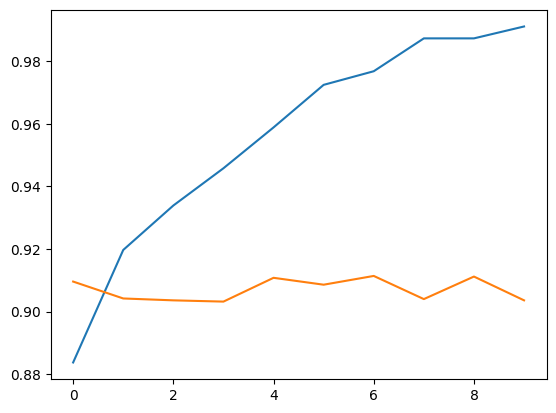

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

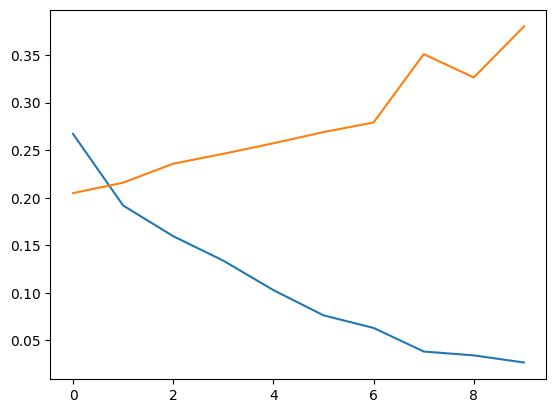

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [27]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
conv_base.trainable = False

In [29]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [31]:
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs = 10,validation_data= validation_generator)

Epoch 1/10
431/625 [===================>..........] - ETA: 45s - loss: 0.3434 - accuracy: 0.8539